In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
# DataFrame creation
df = pd.read_csv("1_EMALengthOptimization.csv") 
df = df.drop(columns = ['No.'])
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

In [3]:
columns_to_plot = ['% of Winners', 'Net % Profit', 'CAR', 'Sharpe Ratio', 'Max. Trade % Drawdown', 'Avg % Profit/Loss', '# Trades']

# Grouping and calculating the average
grouped = df.groupby(['firstMALength', 'secondMALength'])[columns_to_plot].mean().reset_index()

# Pivot the data for heatmap plotting
heatmap_data = {}
for column in columns_to_plot:
    heatmap_data[column] = grouped.pivot(index='firstMALength', columns='secondMALength', values=column)

# Determine the number of rows and columns for subplot grid
n_cols = 2
n_rows = math.ceil(len(columns_to_plot) / n_cols)

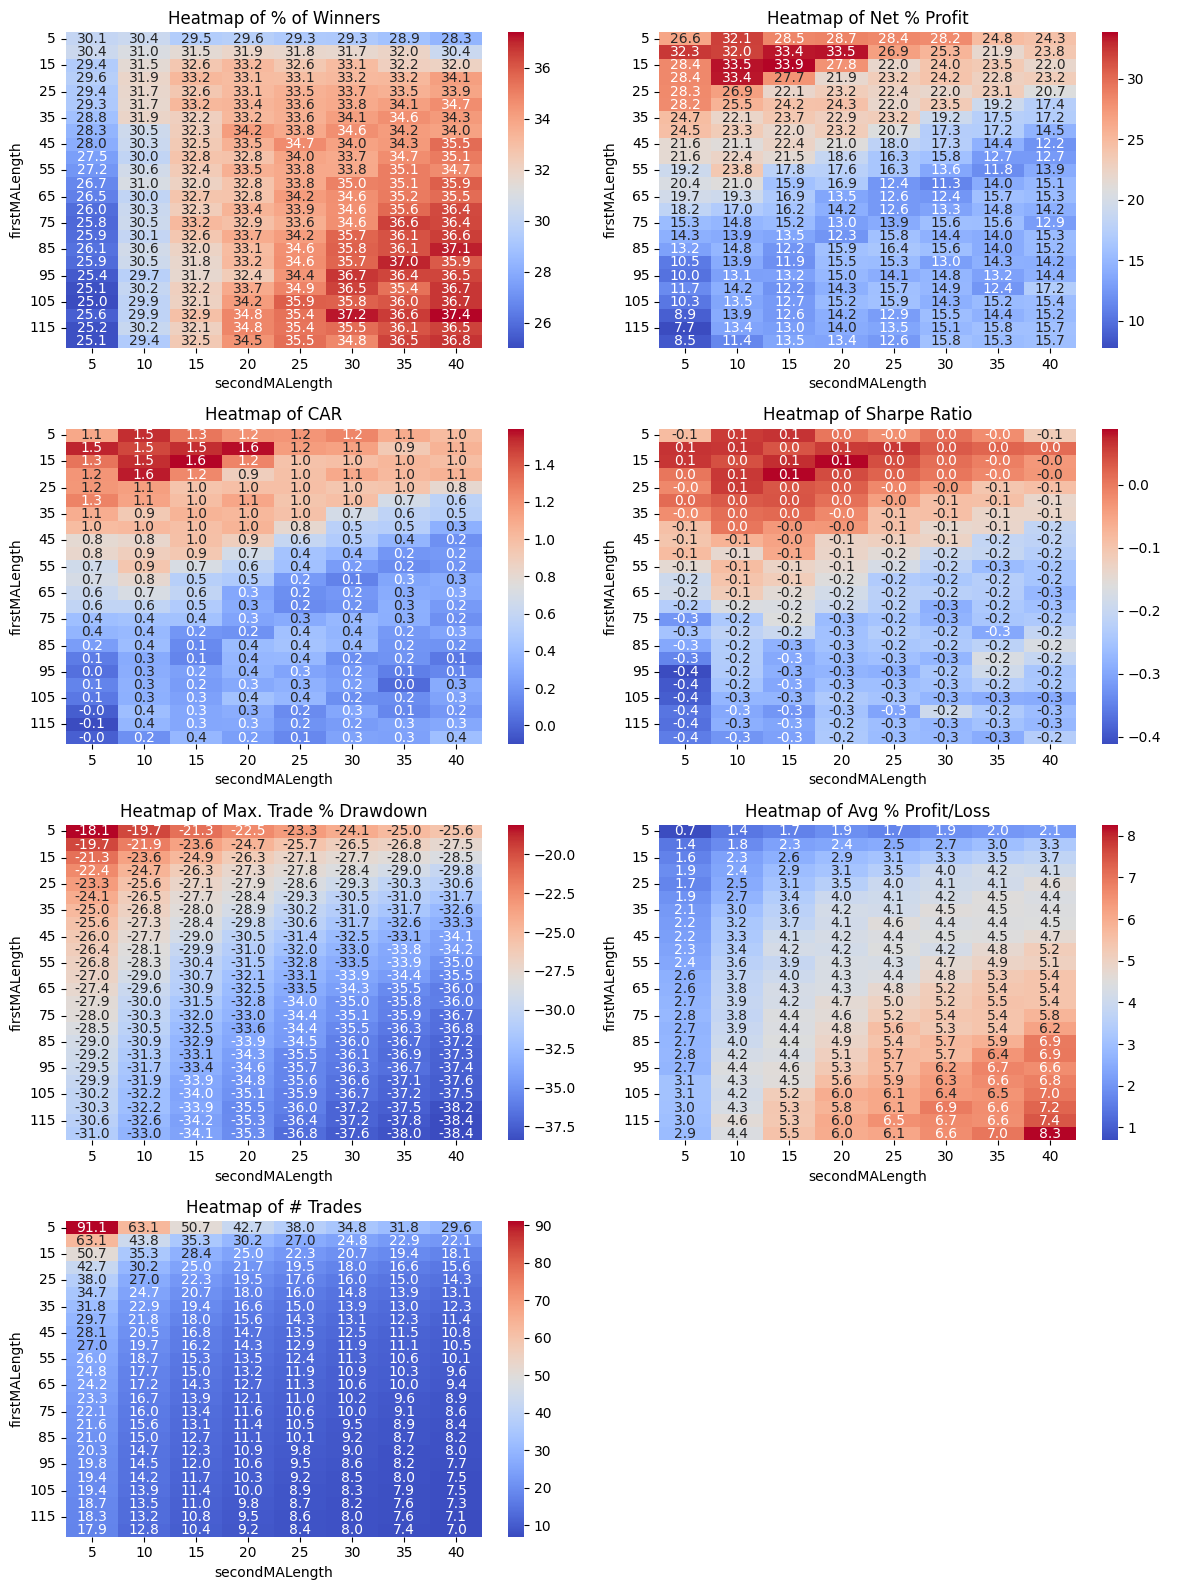

In [4]:
# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

# Flatten axes for easier indexing and handle cases where the grid is uneven
axes = axes.flatten()

# Plot each heatmap
for i, column in enumerate(columns_to_plot):
    sns.heatmap(
        heatmap_data[column],
        ax=axes[i],
        cmap='coolwarm',
        annot=True,
        fmt=".1f",
        cbar=True
    )
    axes[i].set_title(f'Heatmap of {column}')
    axes[i].set_xlabel('secondMALength')
    axes[i].set_ylabel('firstMALength')

# Hide unused subplots if the number of plots is odd
for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()